<a href="https://colab.research.google.com/github/ShahrukhGouhar/DeepLearning.ai-Course/blob/main/TENSORFLOW_PRACTICE_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 and Week 2

## Y = 2X - 1

In [ ]:
# !pip install tensorflow==2.0.0-alpha0

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])

In [ ]:
model.compile(optimizer='sgd',loss='mean_squared_error')

In [ ]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [ ]:
xs.shape, ys.shape

((6,), (6,))

In [ ]:
model.fit(xs,ys,epochs=300)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 35.1562
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 27.9942
Epoch 3/300
1/1 [==============================] - 0s 9ms/step - loss: 22.3526
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 17.9073
Epoch 5/300
1/1 [==============================] - 0s 9ms/step - loss: 14.4034
Epoch 6/300
1/1 [==============================] - 0s 10ms/step - loss: 11.6402
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 9.4599
Epoch 8/300
1/1 [==============================] - 0s 7ms/step - loss: 7.7384
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 6.3779
Epoch 10/300
1/1 [==============================] - 0s 9ms/step - loss: 5.3016
Epoch 11/300
1/1 [==============================] - 0s 18ms/step - loss: 4.4489
Epoch 12/300
1/1 [==============================] - 0s 8ms/step - loss: 3.7724
Epoch 13/300
1/1 [==============================] - 

In [ ]:
print(model.predict([10.0]))

[[18.827192]]


## Exercise_1_House_Prices_Question

In this exercise you'll try to build a neural network that predicts the price of a house according to a simple formula.

So, imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.

Hint: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands' etc.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
# GRADED FUNCTION: house_model
def house_model(y_new):
    xs = np.array([[1,2],[7,8],[5,8],[4,6],[1,6],[3,4]],dtype=float)
    ys = np.array([1,2,5,4,3,8])
    model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[2])]) #,input_shape=[1]
    model.compile(optimizer='sgd',loss='mean_squared_error')
    model.fit(xs,ys,epochs=100,batch_size=1)
    return model.predict(y_new)[0]

In [ ]:
prediction = house_model([[4,5]])
print(prediction)

Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 9.5230
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 13.7124
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 14.1806
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 10.8475
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 9.2334
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 9.9594
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 16.7019
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 10.4797
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 52.9001
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 33.8274
Epoch 11/100
6/6 [==============================] - 0s 6ms/step - loss: 15.6586
Epoch 12/100
6/6 [==============================] - 0s 6ms/step - loss: 10.5521
Epoch 13/100
6/6 [==============================] - 

## COMPUTER VISION

## Beyond Hello World, A Computer Vision Example
In the previous exercise you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function Y=2x-1 directly, instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, and extending that for all values.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

2.6.0


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

In [ ]:
(training_images,training_labels),(test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0

In [ ]:
training_images.shape,test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
training_labels.shape

(60000,)

0
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70 

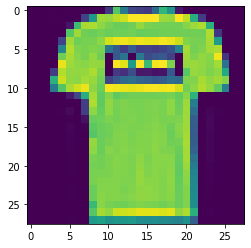

In [ ]:
np.set_printoptions(linewidth=200)
print(training_labels[1])
print(training_images[1])
plt.imshow(training_images[1])
plt.show()

3
[[  0   0   0   0   0   0   0   0   0   0   0  13   4   0   0   0  30   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  67 189 228 255 172 124 255 235 201  94   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  52 246 244 227 217 233 235 229 233 239 255  99   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 180 246 226 232 229 223 228 235 234 230 244 216   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 217 242 229 233 235 235 236 236 233 231 241 240   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 244 242 239 233 233 233 232 234 234 239 239 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 227 230 215 250 233 233 233 236 246 220 227 239   7   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  14 249 178 120 255 227 240 241 227 255 108 148 255  49   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  62 255 136  65 255 231 219 215 233 255  69 100 

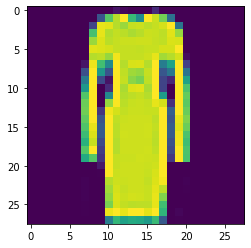

In [ ]:
index = 2500
plt.imshow(training_images[index])
print(training_labels[index])
print(training_images[index])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [ ]:
training_images = training_images/255.0
test_images = test_images/255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!


Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them.

In [ ]:
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(128,activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(10,activation=tf.nn.softmax)
#                                    ])

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation=tf.nn.leaky_relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                    ])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling *model.fit * asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.

In [ ]:
# model.compile(optimizer=tf.optimizers.Adam(),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy']
#               )

# model.fit(training_images,training_labels,epochs=50)

model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(training_images,training_labels,epochs=16,batch_size=8)

Epoch 1/16
7500/7500 [==============================] - 20s 3ms/step - loss: 0.4923 - accuracy: 0.8244
Epoch 2/16
7500/7500 [==============================] - 19s 3ms/step - loss: 0.3914 - accuracy: 0.8582
Epoch 3/16
7500/7500 [==============================] - 19s 2ms/step - loss: 0.3586 - accuracy: 0.8692
Epoch 4/16
7500/7500 [==============================] - 19s 3ms/step - loss: 0.3372 - accuracy: 0.8769
Epoch 5/16
7500/7500 [==============================] - 19s 3ms/step - loss: 0.3221 - accuracy: 0.8819
Epoch 6/16
7500/7500 [==============================] - 19s 3ms/step - loss: 0.3101 - accuracy: 0.8860
Epoch 7/16
7500/7500 [==============================] - 18s 2ms/step - loss: 0.3010 - accuracy: 0.8885
Epoch 8/16
7500/7500 [==============================] - 19s 2ms/step - loss: 0.2935 - accuracy: 0.8910
Epoch 9/16
7500/7500 [==============================] - 19s 3ms/step - loss: 0.2861 - accuracy: 0.8941
Epoch 10/16
7500/7500 [==============================] - 19s 2ms/step - l

Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4247 - accuracy: 0.8617


[0.4247174859046936, 0.8616999983787537]

For me, that returned a accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

To explore further, try the below exercises:


## Exploration Exercises

###Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

[8.4550578e-12 1.8256204e-13 1.6754511e-11 5.4247565e-11 1.7902364e-11 1.2212120e-04 1.8575655e-10 8.9255851e-03 6.7984124e-10 9.9095225e-01]


In [ ]:
classifications.shape, test_images.shape, test_labels.shape

((10000, 10), (10000, 28, 28), (10000,))

In [ ]:
print(test_labels[0], set(test_labels),sep='\n')

9
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
classifications[0].argmax()

9

### What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


####Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For the 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that it's almost certainly a 7.

### How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


####Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

##Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                   ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(training_images,training_labels,epochs=16, batch_size=8)

model.evaluate(test_images,test_labels)

classifications = model.predict(test_images)

print(classifications[0].argmax())
print(test_labels[0])

Epoch 1/16
7500/7500 [==============================] - 21s 3ms/step - loss: 0.4730 - accuracy: 0.8296
Epoch 2/16
7500/7500 [==============================] - 20s 3ms/step - loss: 0.3613 - accuracy: 0.8674
Epoch 3/16
7500/7500 [==============================] - 21s 3ms/step - loss: 0.3287 - accuracy: 0.8797
Epoch 4/16
7500/7500 [==============================] - 21s 3ms/step - loss: 0.3065 - accuracy: 0.8864
Epoch 5/16
7500/7500 [==============================] - 21s 3ms/step - loss: 0.2899 - accuracy: 0.8923
Epoch 6/16
7500/7500 [==============================] - 21s 3ms/step - loss: 0.2786 - accuracy: 0.8960
Epoch 7/16
7500/7500 [==============================] - 21s 3ms/step - loss: 0.2668 - accuracy: 0.9004
Epoch 8/16
7500/7500 [==============================] - 20s 3ms/step - loss: 0.2573 - accuracy: 0.9053
Epoch 9/16
7500/7500 [==============================] - 20s 3ms/step - loss: 0.2490 - accuracy: 0.9075
Epoch 10/16
7500/7500 [==============================] - 21s 3ms/step - l

In [ ]:
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(1024,activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(10,activation=tf.nn.softmax)
#                                     ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy']
#               )

# model.fit(training_images, training_labels,epochs=16, batch_size=8)

# model.evaluate(test_images,test_labels)

# classifications = model.predict(test_images)

# print(classifications[0].argmax())
# print(test_labels[0])

In [ ]:
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(1024,activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(10,activation=tf.nn.softmax)
#                                     ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy']
#               )

# model.fit(training_images, training_labels,epochs=20)

# model.evaluate(test_images,test_labels)

# classifications = model.predict(test_images)

# print(classifications[0])
# print(test_labels[0])

##Exercise 3: 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [ ]:
# import tensorflow as tf
# print(tf.__version__)

# mnist = tf.keras.datasets.mnist

# (training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# training_images = training_images/255.0
# test_images = test_images/255.0

# model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(), # see this line
#                                     tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy')

# model.fit(training_images, training_labels, epochs=5)

# model.evaluate(test_images, test_labels)

# classifications = model.predict(test_images)

# print(classifications[0])
# print(test_labels[0])

##Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [ ]:
# import tensorflow as tf
# print(tf.__version__)

# mnist = tf.keras.datasets.mnist

# (training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# training_images = training_images/255.0
# test_images = test_images/255.0

# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(5, activation=tf.nn.softmax)])  # See this line

# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy')

# model.fit(training_images, training_labels, epochs=5)

# model.evaluate(test_images, test_labels)

# classifications = model.predict(test_images)

# print(classifications[0])
# print(test_labels[0])

##Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                   tf.keras.layers.Dense(256,activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                   ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'mse'])

model.fit(training_images,training_labels,epochs=16, batch_size=8)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/16
7500/7500 [==============================] - 26s 3ms/step - loss: 0.4777 - accuracy: 0.8265 - mse: 27.6764
Epoch 2/16
7500/7500 [==============================] - 25s 3ms/step - loss: 0.3665 - accuracy: 0.8655 - mse: 27.6817
Epoch 3/16
7500/7500 [==============================] - 24s 3ms/step - loss: 0.3311 - accuracy: 0.8782 - mse: 27.6833
Epoch 4/16
7500/7500 [==============================] - 24s 3ms/step - loss: 0.3145 - accuracy: 0.8857 - mse: 27.6844
Epoch 5/16
7500/7500 [==============================] - 24s 3ms/step - loss: 0.2977 - accuracy: 0.8894 - mse: 27.6851
Epoch 6/16
7500/7500 [==============================] - 25s 3ms/step - loss: 0.2885 - accuracy: 0.8941 - mse: 27.6857
Epoch 7/16
7500/7500 [==============================] - 25s 3ms/step - loss: 0.2770 - accuracy: 0.8970 - mse: 27.6861
Epoch 8/16
7500/7500 [==============================] - 25s 3ms/step - loss: 0.2688 - accuracy: 0.9002 - mse: 27.6866
Epoch 9/16
7500/7500 [==============================] - 

##Exercise 6: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [ ]:
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(training_images, training_labels, epochs=30)

# model.evaluate(test_images, test_labels)

# classifications = model.predict(test_images)

# print(classifications[34])
# print(test_labels[34])

##Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [ ]:
# mnist = tf.keras.datasets.mnist
# (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images=training_images/255.0
# test_images=test_images/255.0
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(training_images, training_labels, epochs=5)
# model.evaluate(test_images, test_labels)
# classifications = model.predict(test_images)
# print(classifications[0])
# print(test_labels[0])

In [ ]:
# mnist = tf.keras.datasets.mnist
# (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# # training_images=training_images/255.0
# # test_images=test_images/255.0
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.fit(training_images, training_labels, epochs=5)
# model.evaluate(test_images, test_labels)
# classifications = model.predict(test_images)
# print(classifications[0])
# print(test_labels[0])

##Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('loss')<0.26):
      print('\nReached 90% accuracy so cancelling training!')
      self.model.stop_training = True


callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images,test_labels)  = mnist.load_data()
training_images = training_images/255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(training_images, training_labels,epochs=20, callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4685 - accuracy: 0.8330
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3570 - accuracy: 0.8698
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3192 - accuracy: 0.8831
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2968 - accuracy: 0.8896
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2785 - accuracy: 0.8963
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2618 - accuracy: 0.9018
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2469 - accuracy: 0.9079

Reached 90% accuracy so cancelling training!


In [ ]:
class myCallback(tf.keras.callbacks.Callback):

    def __init__(self,acc):
        self.accuracy = acc

    def on_epoch_end(self,epoch,logs={}):

        if(logs.get('accuracy')>self.accuracy):
            # print(f"\nReached {self.accuracy*100}% accucracy so cancelling training!")
            print(f"\nReached {logs.get('accuracy')*100}% accucracy so cancelling training!")

            self.model.stop_training = True


In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy')>0.9):
#       print("\nReached 90% accuracy so cancelling training!")
#       self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback(acc=0.9)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                    ])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks],batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4744 - accuracy: 0.8320
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3582 - accuracy: 0.8688
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3239 - accuracy: 0.8795
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2987 - accuracy: 0.8882
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2798 - accuracy: 0.8967
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2660 - accuracy: 0.9010

Reached 90.10000228881836% accucracy so cancelling training!


## LAB

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)

In [ ]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


9


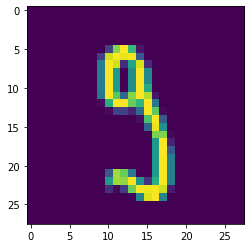

In [ ]:
index = 48
print(training_labels[index])
plt.imshow(training_images[index])
plt.show()

In [ ]:
set(training_labels), training_images.shape,test_images.shape, training_labels.shape, test_labels.shape

({0, 1, 2, 3, 4, 5, 6, 7, 8, 9},
 (60000, 28, 28),
 (10000, 28, 28),
 (60000,),
 (10000,))

In [ ]:
class myCallbacks(tf.keras.callbacks.Callback):

    def __init__(self,acc):
        self.accuracy = acc

    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>self.accuracy):
            print(f'\nReached {logs.get("accuracy")*100}% accuracy so cancelling training!')
            self.model.stop_training = True

callback = myCallbacks(0.95)
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                    ])

model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(training_images, training_labels, epochs=10, callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5758 - accuracy: 0.9061
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3379 - accuracy: 0.9379
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2950 - accuracy: 0.9412
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2603 - accuracy: 0.9450
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2494 - accuracy: 0.9494
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2271 - accuracy: 0.9546

Reached 95.45666575431824% accuracy so cancelling training!


In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2532 - accuracy: 0.9515


[0.25319528579711914, 0.9514999985694885]

In [ ]:
index = 5555
classifications = model.predict(test_images)
print(f'test label = {test_labels[index]}',
      f'predicted label = {np.argmax(classifications[index])}, with probability = {np.max(classifications[index])}')

test label = 3 predicted label = 5, with probability = 0.6585196256637573


In [ ]:
count = 0
for index in range(0,len(classifications)):
    if test_labels[index] != np.argmax(classifications[index]):
        print(f'index = {index},',f'test label = {test_labels[index]},',
            f'predicted label = {np.argmax(classifications[index])}, with probability = {np.max(classifications[index])}')
        count += 1

print('*'*80)
print('Total misclassified points = {}'.format(count))

index = 38, test label = 2, predicted label = 3, with probability = 0.7320855259895325
index = 61, test label = 8, predicted label = 2, with probability = 0.7674737572669983
index = 149, test label = 2, predicted label = 4, with probability = 0.3353000283241272
index = 171, test label = 7, predicted label = 2, with probability = 0.9286666512489319
index = 241, test label = 9, predicted label = 5, with probability = 0.366839200258255
index = 247, test label = 4, predicted label = 6, with probability = 0.8199314475059509
index = 259, test label = 6, predicted label = 0, with probability = 0.9999815225601196
index = 274, test label = 9, predicted label = 3, with probability = 0.8301347494125366
index = 300, test label = 4, predicted label = 6, with probability = 0.9389573931694031
index = 320, test label = 9, predicted label = 7, with probability = 0.6858922243118286
index = 340, test label = 5, predicted label = 3, with probability = 0.9967537522315979
index = 352, test label = 5, predic

7
7


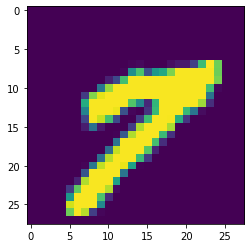

In [ ]:
index = 6741
print(test_labels[index])
print(np.argmax(classifications[index]))
plt.imshow(test_images[index])
plt.show()

In [ ]:
# GRADED FUNCTION: train_mnist
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE
    class myCallback(tf.keras.callbacks.Callback):

        def __init__(self,acc):
            self.accuracy = acc

        def on_epoch_end(self,epoch,logs={}):
            if(logs.get('accuracy')>self.accuracy):
                print(f'\nReached accuracy = {logs.get("accuracy")*100}% so cancelling training')
                self.model.stop_training = True
    
    callback = myCallback(0.99)
    # YOUR CODE SHOULD END HERE

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    x_train = x_train/255.0
    x_test = x_test/255.0
    
    # YOUR CODE SHOULD START HERE

    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                                        # tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                        # tf.keras.layers.Dense(256,activation=tf.nn.relu),
                                        # tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                        # tf.keras.layers.Dense(64,activation=tf.nn.relu),

                                        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                       ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
                     )
    
    # model fitting
    history = model.fit(x_train,y_train,epochs=10,callbacks=[callback])
    # model fitting
    evaluate = model.evaluate(x_test, y_test)
    return history.epoch, history.history['accuracy'][-1], model, evaluate

In [ ]:
epoch, acc, model,evaluate = train_mnist()

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1866 - accuracy: 0.9444
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0743 - accuracy: 0.9774
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0482 - accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0338 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0261 - accuracy: 0.9913

Reached accuracy = 99.1349995136261% so cancelling training
313/313 [==============================] - 1s 3ms/step - loss: 0.0687 - accuracy: 0.9791


In [ ]:
epoch,acc,model,evaluate

([0, 1, 2, 3, 4],
 0.991349995136261,
 [0.06869816035032272, 0.9790999889373779])

In [ ]:
index = 5858
print(training_labels[index])
training_images[index]

3


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  19, 164, 254, 255, 254, 186,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  70, 226, 253, 245, 136, 220, 253, 117,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 109, 241, 228, 123,  48,   0,  20, 253, 117,   0,   0

In [ ]:
# print(training_labels[index])

# for i in range(0,1000,55):
#     plt.imshow(training_images[index]+i)
#     plt.show()

# Week 3 CNN

In [ ]:
import tensorflow as tf
import numpy as np
np.set_printoptions(linewidth=200)
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print(training_images.shape,training_labels.shape,test_images.shape,test_labels.shape)

print(training_images[0])
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.0
# print(training_images[0])

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5, batch_size=32)
test_loss = model.evaluate(test_images, test_labels)

2.6.0
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   

## Vizualizing the Convulation and Pooling

In [ ]:
for i in range(100):
    print((i,test_labels[i]), end='**')


(0, 9)**(1, 2)**(2, 1)**(3, 1)**(4, 6)**(5, 1)**(6, 4)**(7, 6)**(8, 5)**(9, 7)**(10, 4)**(11, 5)**(12, 7)**(13, 3)**(14, 4)**(15, 1)**(16, 2)**(17, 4)**(18, 8)**(19, 0)**(20, 2)**(21, 5)**(22, 7)**(23, 9)**(24, 1)**(25, 4)**(26, 6)**(27, 0)**(28, 9)**(29, 3)**(30, 8)**(31, 8)**(32, 3)**(33, 3)**(34, 8)**(35, 0)**(36, 7)**(37, 5)**(38, 7)**(39, 9)**(40, 6)**(41, 1)**(42, 3)**(43, 7)**(44, 6)**(45, 7)**(46, 2)**(47, 1)**(48, 2)**(49, 2)**(50, 4)**(51, 4)**(52, 5)**(53, 8)**(54, 2)**(55, 2)**(56, 8)**(57, 4)**(58, 8)**(59, 0)**(60, 7)**(61, 7)**(62, 8)**(63, 5)**(64, 1)**(65, 1)**(66, 2)**(67, 3)**(68, 9)**(69, 8)**(70, 7)**(71, 0)**(72, 2)**(73, 6)**(74, 2)**(75, 3)**(76, 1)**(77, 2)**(78, 8)**(79, 4)**(80, 1)**(81, 8)**(82, 5)**(83, 9)**(84, 5)**(85, 0)**(86, 3)**(87, 2)**(88, 0)**(89, 6)**(90, 5)**(91, 3)**(92, 6)**(93, 7)**(94, 1)**(95, 8)**(96, 0)**(97, 1)**(98, 4)**(99, 2)**

In [ ]:
# test_images

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

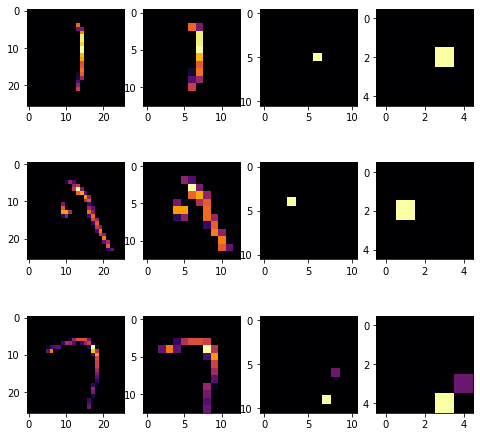

In [ ]:
f, axarr = plt.subplots(3,4,figsize=(8,8))
FIRST_IMAGE = 40
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1
layer_outputs = [layer.output for layer in model.layers]
# print(layer_outputs)
# print('*'*80)
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
# print(activation_model)
# print('*'*80)

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1),batch_size=1)[x]
    axarr[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1),batch_size=1)[x]
    axarr[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1),batch_size=1)[x]
    axarr[2,x].imshow(f3[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
    axarr[2,x].grid(False)

In [ ]:
class myCallbacks(tf.keras.callbacks.Callback):

    def __init__(self,acc):
        self.accuracy = acc

    # def on_epoch_end(self, epoch, logs={}):
    #     if(logs.get('accuracy')>self.accuracy):
    #         print(f'\nReached {logs.get("accuracy")*100}% accuracy so cancelling training!')
    #         self.model.stop_training = True
    
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>=self.accuracy):
            print(f'Reached {logs.get("accuracy")*100}% accuracy so cancelling training!')
            self.model.stop_training=True


In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')                                    
])

callback = myCallbacks(0.999)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels,epochs=10,batch_size=32,callbacks=[callback])
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(test_acc)

2.6.0
Epoch 1/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1205 - accuracy: 0.9632
Epoch 2/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0399 - accuracy: 0.9876
Epoch 3/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0267 - accuracy: 0.9916
Epoch 4/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0191 - accuracy: 0.9936
Epoch 5/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0154 - accuracy: 0.9951
Epoch 6/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0117 - accuracy: 0.9963
Epoch 7/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0109 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0069 - accuracy: 0.9976
Epoch 9/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0077 - accuracy: 0.9973
Epoch 10/10
313/313 [==============================] - 4s 

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')                                    
])

callback = myCallbacks(0.999)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels,epochs=10,batch_size=32,callbacks=[callback])
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(test_acc)

2.6.0
Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1425 - accuracy: 0.9571
Epoch 2/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0495 - accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0313 - accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0204 - accuracy: 0.9933
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0133 - accuracy: 0.9958
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0097 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0070 - accuracy: 0.9977
Epoch 8/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0065 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0052 - accuracy: 0.9982
Epoch 10/10
313/313 [==============================] - 3s 

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.0

# with 32 conv
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')                                    
])

callback = myCallbacks(0.999)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels,epochs=10,batch_size=32, callbacks=[callback])
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(test_acc)

2.6.0
Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1508 - accuracy: 0.9535
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0504 - accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0343 - accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0255 - accuracy: 0.9923
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0196 - accuracy: 0.9935
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0146 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0120 - accuracy: 0.9959
Epoch 8/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0103 - accuracy: 0.9964
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0089 - accuracy: 0.9970
Epoch 10/10
313/313 [==============================] - 2s 

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.0

# with 16 conv
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')                                    
])


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels,epochs=10,batch_size=32,callbacks=[callback])
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(test_acc)

2.6.0
Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1806 - accuracy: 0.9446
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0625 - accuracy: 0.9807
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0426 - accuracy: 0.9864
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0318 - accuracy: 0.9901
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0259 - accuracy: 0.9921
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0209 - accuracy: 0.9934
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0180 - accuracy: 0.9941
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0139 - accuracy: 0.9953
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0122 - accuracy: 0.9958
Epoch 10/10
313/313 [==============================] - 2s 

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.0

#with 32conv and 1 convulation and pooling layer

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')                                    
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels,epochs=10,batch_size=32,callbacks=[callback])
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(test_acc)

2.6.0
Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1427 - accuracy: 0.9578
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0497 - accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0315 - accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0211 - accuracy: 0.9931
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0143 - accuracy: 0.9953
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0112 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0083 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0061 - accuracy: 0.9982
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0055 - accuracy: 0.9980
Epoch 10/10
313/313 [==============================] - 2s 

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.0

#with 16conv and 1 convulation and pooling layer

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')                                    
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels,epochs=10,batch_size=32,callbacks=[callback])
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(test_acc)

2.6.0
Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1718 - accuracy: 0.9493
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0569 - accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0372 - accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0249 - accuracy: 0.9922
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0176 - accuracy: 0.9947
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0116 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0094 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0075 - accuracy: 0.9975
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0055 - accuracy: 0.9982
Epoch 10/10
313/313 [==============================] - 2s 

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.0

#with 32conv and 3 convulation and pooling layer

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')                                    
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels,epochs=10,batch_size=32,callbacks=[callback])
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(test_acc)



2.6.0
Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2584 - accuracy: 0.9184
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0906 - accuracy: 0.9717
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0683 - accuracy: 0.9790
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0568 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0471 - accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0400 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0339 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0302 - accuracy: 0.9903
Epoch 9/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0263 - accuracy: 0.9913
Epoch 10/10
313/313 [==============================] - 2s 

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.0

#with 64conv and 3 convulation and pooling layer

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')                                    
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels,epochs=10,batch_size=32)
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(test_acc)

2.6.0
Epoch 1/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.2066 - accuracy: 0.9357
Epoch 2/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0699 - accuracy: 0.9785
Epoch 3/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0489 - accuracy: 0.9846
Epoch 4/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0380 - accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0299 - accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0242 - accuracy: 0.9921
Epoch 7/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0209 - accuracy: 0.9932
Epoch 8/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0179 - accuracy: 0.9941
Epoch 9/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0144 - accuracy: 0.9956
Epoch 10/10
313/313 [==============================] - 4s 

## Exploring Convolutions

In [ ]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

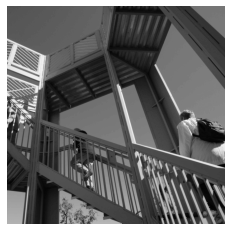

In [ ]:
i = misc.ascent()
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [ ]:
i_transformed = np.copy(i)

size_x, size_y = i_transformed.shape


In [ ]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
filter = [[0,1,0],[1,-4,1],[0,1,0]]

# A couple more filter to try for fun
# filter = [[-1,-2,-1],[0,0,0],[1,2,1]]
# filter = [[-1,0,1],[-2,0,2],[-1,0,1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [ ]:
# Convolution
for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution += (i[x-1,y-1]*filter[0][0])
        convolution += (i[x-1,y]*filter[0][1])
        convolution += (i[x-1,y+1]*filter[0][2])
        convolution += (i[x,y-1]*filter[1][0])
        convolution += (i[x,y]*filter[1][1])
        convolution += (i[x,y+1]*filter[1][2])
        convolution += (i[x+1,y-1]*filter[2][0])
        convolution += (i[x+1,y]*filter[2][1])
        convolution += (i[x+1,y+1]*filter[2][2])
        convolution *= weight

        if convolution < 0:
            convolution = 0
        if convolution > 255:
            convolution = 255
        i_transformed[x,y] = convolution

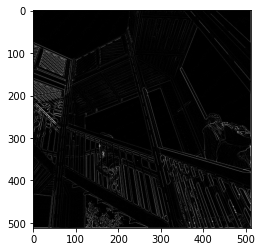

In [ ]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

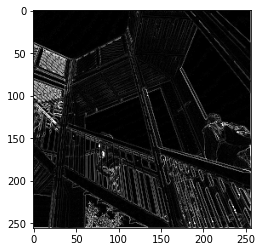

In [ ]:
# Pooling
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x,new_y))

for x in range(0,size_x,2):
    for y in range(0,size_y,2):
        pixels=[]
        pixels.append(i_transformed[x,y])
        pixels.append(i_transformed[x+1,y])
        pixels.append(i_transformed[x,y+1])
        pixels.append(i_transformed[x+1,y+1])
        newImage[int(x/2),int(y/2)] = max(pixels)


# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

In [ ]:
# Convolution 2
size_x2, size_y2 = newImage.shape

for x in range(1,size_x2-1):
    for y in range(1,size_y2-1):
        convolution = 0.0
        convolution += (newImage[x-1,y-1]*filter[0][0])
        convolution += (newImage[x-1,y]*filter[0][1])
        convolution += (newImage[x-1,y+1]*filter[0][2])
        convolution += (newImage[x,y-1]*filter[1][0])
        convolution += (newImage[x,y]*filter[1][1])
        convolution += (newImage[x,y+1]*filter[1][2])
        convolution += (newImage[x+1,y-1]*filter[2][0])
        convolution += (newImage[x+1,y]*filter[2][1])
        convolution += (newImage[x+1,y+1]*filter[2][2])
        convolution *= weight

        if convolution < 0:
            convolution = 0
        if convolution > 255:
            convolution = 255
        newImage[x,y] = convolution

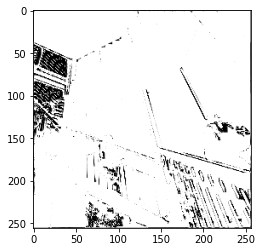

In [ ]:
# Plot the image. Note the size of the axes -- they are 256 by 256
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()

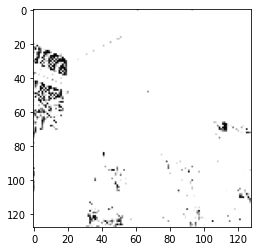

In [ ]:
# Pooling 2
new_x = int(size_x2/2)
new_y = int(size_y2/2)
newImage2 = np.zeros((new_x, new_y))
for x in range(0, size_x2, 2):
  for y in range(0, size_y2, 2):
    pixels = []
    pixels.append(newImage[x, y])
    pixels.append(newImage[x+1, y])
    pixels.append(newImage[x, y+1])
    pixels.append(newImage[x+1, y+1])
    newImage2[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 128 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage2)
#plt.axis('off')
plt.show()      

## Week 3 Lab

In [ ]:
import tensorflow as tf

In [ ]:

def train_mnist_conv():
    
    class myCallbacks(tf.keras.callbacks.Callback):
        
        def __init__(self,acc):
            self.accuracy = acc
            
        def on_epoch_end(self,epoch,logs={}):
            if(logs.get('accuracy')>=self.accuracy):
                print('Reached 99.8% accuracy so cancelling training!')
                self.model.stop_training=True
                
    callback = myCallbacks(0.998)

    mnist = tf.keras.datasets.mnist
    (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
    training_images = training_images.reshape(60000,28,28,1)
    training_images = training_images/255.0
    test_images = test_images.reshape(10000,28,28,1)
    test_images = test_images/255.0

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu')  ,    
        tf.keras.layers.Dense(10,activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(
        training_images,training_labels,epochs=20,batch_size=32,callbacks=[callback]
    )
    return history.epoch, history.history['accuracy'][-1]



In [ ]:
_, _ = train_mnist_conv()

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1358 - accuracy: 0.9590
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0459 - accuracy: 0.9861
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0286 - accuracy: 0.9910
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0186 - accuracy: 0.9942
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0129 - accuracy: 0.9956
Epoch 6/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0096 - accuracy: 0.9968
Epoch 7/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0076 - accuracy: 0.9973
Epoch 8/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0049 - accuracy: 0.9987
Reached 99.8% accuracy so cancelling training!


In [ ]:
# class myCallbacks(tf.keras.callbacks.Callback):
        
#         def __init__(self,acc):
#             self.accuracy = acc
            
#         def on_epoch_end(self,epoch,logs={}):
#             if(logs.get('accuracy')>=self.accuracy):
#                 print('Reached 99.8% accuracy so cancelling training!')
#                 self.model.stop_training=True


# callback = myCallbacks(0.998)


# def train_mnist_conv():
                
#     mnist = tf.keras.datasets.mnist
#     (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#     training_images = training_images.reshape(60000,28,28,1)
#     training_images = training_images/255.0
#     test_images = test_images.reshape(10000,28,28,1)
#     test_images = test_images/255.0

#     model = tf.keras.models.Sequential([
#         tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
#         tf.keras.layers.MaxPooling2D(2,2),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(128,activation='relu')  ,    
#         tf.keras.layers.Dense(10,activation='softmax')
#     ])

#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     history = model.fit(
#         training_images,training_labels,epochs=20,batch_size=32,callbacks=[callback]
#     )
#     return history.epoch, history.history['accuracy'][-1]



In [ ]:
class myCallbacks(tf.keras.callbacks.Callback):
        
    def __init__(self,acc):
        self.accuracy = acc
        
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>=self.accuracy):
            print('Reached 99.8% accuracy so cancelling training!')
            self.model.stop_training=True


class myModel(object):

    def train_mnist_conv(self,callback,size):
                    
        mnist = tf.keras.datasets.mnist
        (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
        training_images = training_images.reshape(60000,28,28,1)
        training_images = training_images/255.0
        test_images = test_images.reshape(10000,28,28,1)
        test_images = test_images/255.0

        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128,activation='relu')  ,    
            tf.keras.layers.Dense(10,activation='softmax')
        ])

        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(
            training_images,training_labels,epochs=20,batch_size=size,callbacks=[callback]
        )
        return history.epoch, history.history['accuracy'][-1]

In [ ]:
callback = myCallbacks(0.998)
myModel = myModel()
myModel.train_mnist_conv(callback=callback,size=32)

Epoch 1/20
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1351 - accuracy: 0.9592
Epoch 2/20
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 3/20
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0273 - accuracy: 0.9912
Epoch 4/20
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0182 - accuracy: 0.9944
Epoch 5/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0119 - accuracy: 0.9960
Epoch 6/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0088 - accuracy: 0.9969
Epoch 7/20
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0070 - accuracy: 0.9978
Epoch 8/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0052 - accuracy: 0.9982
Reached 99.8% accuracy so cancelling training!


([0, 1, 2, 3, 4, 5, 6, 7], 0.9981833100318909)

# Week 4

In [ ]:
# Horse vs Human prediction
# Data from disk. Similar images with similar features on different location

!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:01<00:00, 147MB/s]


In [ ]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse09-8.png', 'horse24-9.png', 'horse15-4.png', 'horse07-6.png', 'horse29-3.png', 'horse01-1.png', 'horse34-2.png', 'horse19-6.png', 'horse21-2.png', 'horse37-1.png']
['human14-30.png', 'human17-12.png', 'human15-21.png', 'human09-18.png', 'human02-26.png', 'human03-07.png', 'human12-19.png', 'human04-20.png', 'human14-03.png', 'human17-07.png']


In [ ]:
print('total training horse images:', len(train_horse_names))
print('total training human images:', len(train_human_names))

total training horse images: 500
total training human images: 527


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

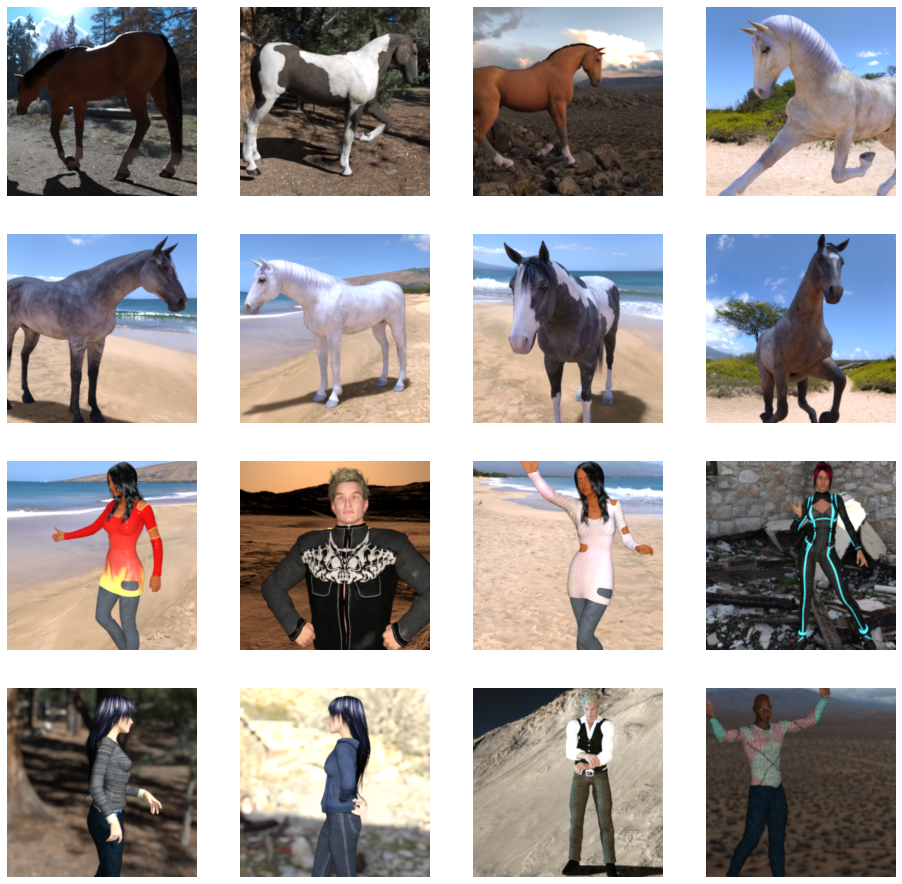

In [ ]:
# Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]

next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i , img_path in enumerate(next_horse_pix+next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis("Off") # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [ ]:
# Building a Small Model from Scratch
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics=['accuracy']
              )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory('./horse-or-human/', # This is the source directory for training images
                                                    target_size=(300,300),
                                                    batch_size=128,
                                                    class_mode = 'binary'
                                                    )

Found 1027 images belonging to 2 classes.


In [ ]:
# Training
history = model.fit(train_generator,
                    steps_per_epoch=8,
                    epochs=15,
                    verbose=1)

Epoch 1/15
8/8 [==============================] - 41s 831ms/step - loss: 1.5124 - accuracy: 0.5010
Epoch 2/15
8/8 [==============================] - 8s 916ms/step - loss: 0.6682 - accuracy: 0.6494
Epoch 3/15
8/8 [==============================] - 7s 838ms/step - loss: 0.6794 - accuracy: 0.7197
Epoch 4/15
8/8 [==============================] - 7s 815ms/step - loss: 0.5487 - accuracy: 0.7430
Epoch 5/15
8/8 [==============================] - 8s 911ms/step - loss: 0.3145 - accuracy: 0.8584
Epoch 6/15
8/8 [==============================] - 7s 799ms/step - loss: 0.3977 - accuracy: 0.8865
Epoch 7/15
8/8 [==============================] - 7s 891ms/step - loss: 0.2154 - accuracy: 0.9199
Epoch 8/15
8/8 [==============================] - 7s 815ms/step - loss: 0.3867 - accuracy: 0.9021
Epoch 9/15
8/8 [==============================] - 7s 816ms/step - loss: 0.7787 - accuracy: 0.8877
Epoch 10/15
8/8 [==============================] - 7s 809ms/step - loss: 0.0787 - accuracy: 0.9733
Epoch 11/15
8/8 [=

In [ ]:
# Running the Model
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    # Predicting Images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(300,300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0] > 0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")

Saving horse_2.jpeg to horse_2.jpeg
[0.]
horse_2.jpeg is a horse


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


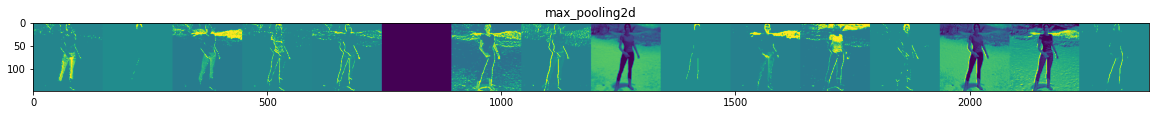

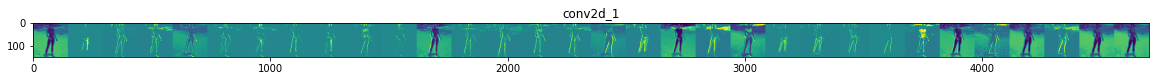

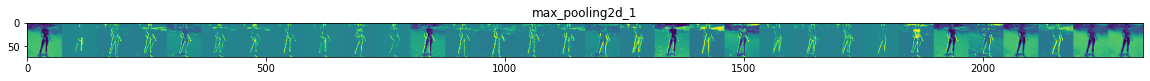

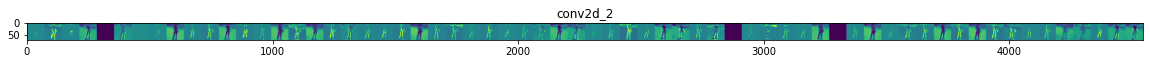

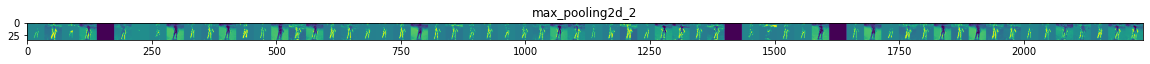

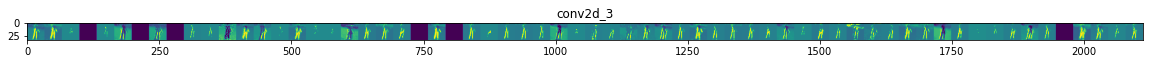

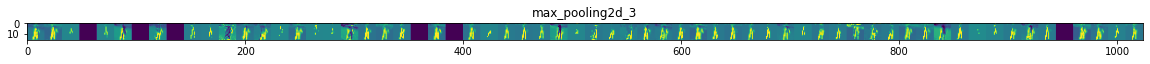

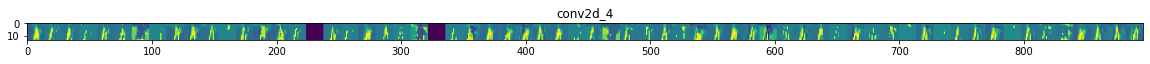

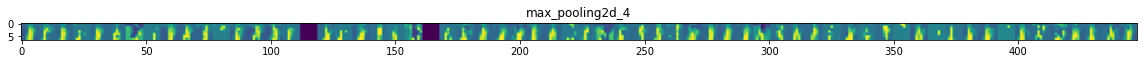

In [ ]:
# Visualizing Intermediate Representations
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img


# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
vizualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300,300)) # this is PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,)+x.shape) # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = vizualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1] # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size*n_features))
        for i in range(n_features):
            # Postprocess the feature to make it visually palatable
            x = feature_map[0,:,:,i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x,0,255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:,i*size:(i+1)*size] = x
        # Display the grid
        scale = 20./n_features
        plt.figure(figsize=(scale*n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto',cmap='viridis')

## Clean Up
Before running the next exercise, run the following cell to terminate the kernel and free memory resources:



In [ ]:
# import os, signal
# os.kill(os.getpid(), signal.SIGKILL)